In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [2]:
import sys

SOURCE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
sys.path.insert(0, SOURCE_DIR)

In [3]:
import malaya_speech
import tensorflow as tf

In [4]:
tf_featurizer = malaya_speech.tf_featurization.STTFeaturizer(normalize_per_feature = True, frame_ms = 20)
featurizer = malaya_speech.featurization.STTFeaturizer()

In [5]:
tf_x = tf.placeholder(tf.float32, [None])
tf_y = tf_featurizer(tf_x)
tf_y

<tf.Tensor 'truediv_1:0' shape=(?, 80) dtype=float32>

In [6]:
x, sr = malaya_speech.load('../speech/example-speaker/husein-zolkepli.wav')
len(x), sr

(90090, 16000)

In [7]:
y = featurizer(x)
y.shape

(564, 80)

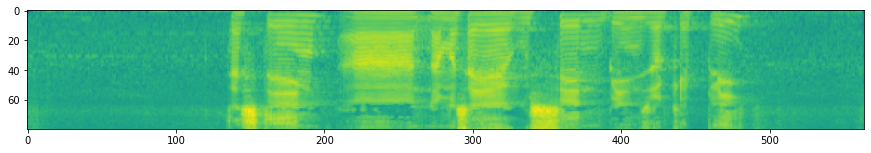

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
plt.imshow(y.T)

In [11]:
sess = tf.InteractiveSession()

In [12]:
tf_y_ = sess.run(tf_y, feed_dict = {tf_x: x})
tf_y_.shape

(562, 80)

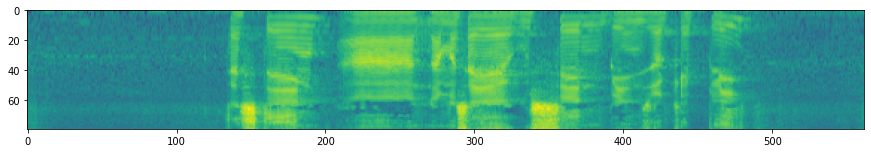

In [14]:
plt.figure(figsize = (15, 5))
plt.imshow(tf_y_.T)

In [15]:
tf_y_.T

array([[-4.5483155 , -2.118136  , -1.9386415 , ...,  1.0080111 ,
         0.7134196 ,  1.2439401 ],
       [-3.37735   , -1.9941479 , -2.3797362 , ...,  0.27358437,
        -0.14869615,  0.4044142 ],
       [-2.6192312 , -1.600325  , -2.4897308 , ...,  0.11239087,
        -0.482682  ,  0.15768786],
       ...,
       [-0.39385188, -1.0144275 , -0.24804272, ..., -0.734866  ,
        -0.73637056, -0.71594924],
       [-0.63183296, -0.73435813, -0.2193389 , ..., -0.5555732 ,
        -0.37199405, -0.5483341 ],
       [-0.10633165, -0.288186  , -0.01350513, ..., -0.74950683,
        -0.29350373, -0.3246293 ]], dtype=float32)

In [16]:
y.T

array([[-7.53611039, -4.4259217 , -2.05888087, ...,  0.26031402,
         0.72409595, -3.33154959],
       [-4.14166464, -2.56938734, -1.57183975, ..., -0.62878154,
        -0.14650638, -2.44400083],
       [-3.43010253, -1.7760993 , -1.09078852, ..., -0.76094785,
        -0.60550516, -1.96338346],
       ...,
       [-0.39000751, -0.30257199, -0.55734636, ..., -0.92948758,
        -0.51183845, -1.35868982],
       [-0.48415156, -0.59094502, -0.84745355, ..., -0.41705121,
        -0.63578017, -0.96081488],
       [-0.20671368, -0.21054114, -0.35583804, ..., -0.34357668,
        -0.38823082, -1.1373016 ]])